In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# one variate rnn model

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DS_course/00-Thursday/Session 4/LSTM-Multivariate_pollution.csv')
X=df['temp'].copy()

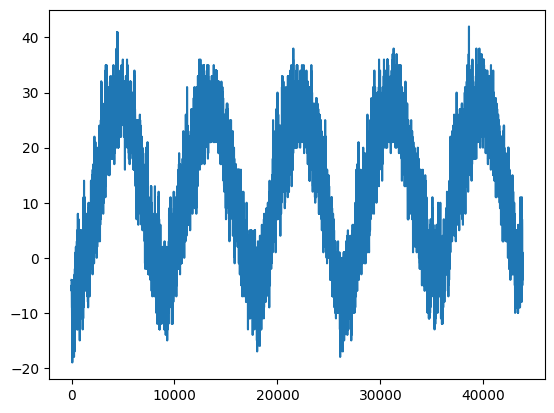

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X)

In [ ]:
X=df['temp']


In [ ]:
import numpy as np

def create_time_windows(vector, window_size, step_size):
    """
    Create time windows from the input vector.

    Parameters:
    vector (np.ndarray): Input vector.
    window_size (int): Size of each window.
    step_size (int): Step size between windows.

    Returns:
    np.ndarray: Array of windows.
    """
    num_windows = (len(vector) - window_size) // step_size + 1
    windows = np.array([vector[i*step_size:i*step_size+window_size] for i in range(num_windows)])
    return windows


windows = create_time_windows(X, 24, 12)
print(windows)


[[ -4.  -4.  -5. ...  -5.  -6.  -6.]
 [ -5.  -5.  -5. ...  -9.  -9.  -9.]
 [ -6.  -6.  -7. ... -10.  -9. -11.]
 ...
 [ -2.  -2.  -4. ...   4.   2.   0.]
 [  7.   6.   6. ...  -3.  -2.  -2.]
 [ -1.  -1.  -1. ...  -3.  -4.  -3.]]


In [ ]:
y=pd.DataFrame(windows)[23].values
y

array([ -6.,  -9., -11., ...,   0.,  -2.,  -3.])

In [ ]:
X=pd.DataFrame(windows).iloc[:,:23]
X
# X.drop(index=[3648],inplace=True)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-4.0,-4.0,-5.0,-5.0,-5.0,-6.0,-6.0,-5.0,-6.0,-5.0,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-6.0
1,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,...,-6.0,-7.0,-7.0,-7.0,-8.0,-8.0,-9.0,-9.0,-9.0,-9.0
2,-6.0,-6.0,-7.0,-7.0,-7.0,-8.0,-8.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-10.0,-9.0
3,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-10.0,...,-9.0,-10.0,-11.0,-11.0,-12.0,-12.0,-13.0,-13.0,-13.0,-12.0
4,-12.0,-9.0,-10.0,-11.0,-11.0,-12.0,-12.0,-13.0,-13.0,-13.0,...,-10.0,-10.0,-9.0,-9.0,-11.0,-11.0,-12.0,-12.0,-13.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,-4.0,-5.0,-5.0,-6.0,-7.0,-7.0,-8.0,-7.0,-6.0,-2.0,...,11.0,11.0,11.0,11.0,10.0,6.0,3.0,1.0,0.0,-3.0
3645,9.0,11.0,11.0,11.0,11.0,10.0,6.0,3.0,1.0,0.0,...,-2.0,-4.0,-2.0,-5.0,-3.0,-2.0,-3.0,0.0,2.0,5.0
3646,-2.0,-2.0,-4.0,-2.0,-5.0,-3.0,-2.0,-3.0,0.0,2.0,...,6.0,6.0,6.0,6.0,5.0,2.0,6.0,5.0,4.0,2.0
3647,7.0,6.0,6.0,6.0,6.0,5.0,2.0,6.0,5.0,4.0,...,-1.0,-1.0,-1.0,-2.0,-3.0,-4.0,-5.0,-5.0,-3.0,-2.0


In [ ]:
print(X.shape)
print(y.shape)

(3649, 23)
(3649,)


In [ ]:
scaler = MinMaxScaler()
normalized_vector = scaler.fit_transform(vector.reshape(-1, 1)).flatten()
normalized_vector, scaler

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42,shu)

X_train=X.iloc[:3000]
X_test=X.iloc[3000:]
y_train=y[:3000]
y_test=y[3000:]



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,LSTM

# Example data
n_samples = 1000  # Number of samples in your dataset
timesteps = 24    # Number of timesteps (features per sample)
input_dim = 1     # Since each feature is one-dimensional


# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss}")

# Predict using the model
predictions = model.predict(X_test)
print(predictions)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 88.5913
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4610
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1661
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9052
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8765
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6838
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5906
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4458
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5883
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4149
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4191
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2943
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3260
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3991
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3170
Epoch 16/20
94/94 ━━━━━━━━━━━

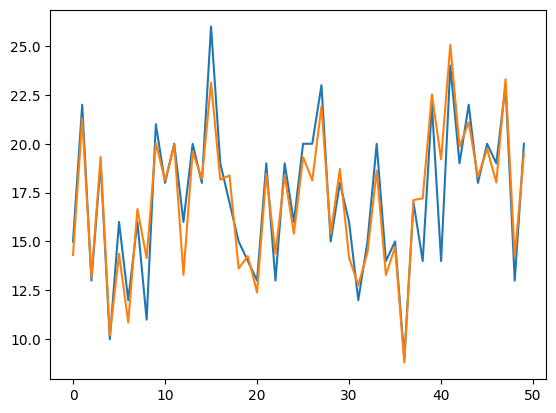

In [ ]:
plt.plot(y_test[100:150])
plt.plot(predictions[100:150])

# multivariate RNN

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/content/LSTM-Multivariate_pollution.csv')
df['date']=df['date'].apply(lambda x: x[:10])

d=df['date']
df=pd.get_dummies(df.iloc[:,1:])
df['date']=d
df=df.replace(False,0)
df=df.replace(True,1)

In [3]:
df

,pollution,dew,temp,press,wnd_spd,snow,rain,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv,date
0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0,2010-01-02
1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0,2010-01-02
2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0,2010-01-02
3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0,2010-01-02
4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0,2010-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...
43795,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,2014-12-31
43796,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,2014-12-31
43797,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,2014-12-31
43798,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,2014-12-31


In [4]:

# df.groupby('date')['pollution'].mean()
new_df=pd.DataFrame(columns=df.columns)
new_df
for item in df.columns[:-1]:
  new_df[item]=df.groupby('date')[item].mean()

In [5]:
df2=new_df.reset_index(drop=True)
df2.drop(columns=['date'],inplace=True)
df2

,pollution,dew,temp,press,wnd_spd,snow,rain,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv
0,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,0.000000,0.000000,1.000000,0.000000
1,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,0.000000,0.166667,0.750000,0.083333
2,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
3,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,0.375000,0.583333,0.000000,0.041667
4,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,0.500000,0.416667,0.000000,0.083333
...,...,...,...,...,...,...,...,...,...,...,...
1820,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.000000,0.0,0.000000,0.541667,0.125000,0.333333
1821,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.000000,0.0,0.166667,0.625000,0.000000,0.208333
1822,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.000000,0.0,0.041667,0.375000,0.000000,0.583333
1823,46.083333,-13.916667,1.875000,1019.125000,9.778333,0.000000,0.0,0.125000,0.500000,0.208333,0.166667


In [6]:
# windowing
def _time_windowing(df,window_size):
  windowed=[]
  for item in range(window_size,len(df)):
    windowed.append(df.iloc[item-window_size:item,:].values.flatten())
  print(np.array(windowed).shape)
  return windowed

temp=_time_windowing(df2,7)

(1818, 77)


In [7]:
X=pd.DataFrame(temp).iloc[:-1,:]

In [8]:
y=df2[['snow', 'rain']][8:].values

In [9]:
print(X.shape,y.shape)

(1817, 77) (1817, 2)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# y= scaler.fit_transform(y)


In [11]:
X=pd.DataFrame(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)


In [13]:
X_train.shape

(1453, 77)

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,LSTM
from  tensorflow.keras.layers import Dense,Dropout
from  tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1

# Example data
n_samples = 1000  # Number of samples in your dataset
timesteps = 24    # Number of timesteps (features per sample)
input_dim = 1     # Since each feature is one-dimensional


# Build the RNN model
model = Sequential()
# model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1),return_sequences=True, kernel_regularizer=L1(0.01)))
model.add(Dropout(0.4))
model.add(LSTM(150, activation='relu',return_sequences=True))
model.add(LSTM(250, activation='relu',return_sequences=True))
model.add(LSTM(250, activation='relu',return_sequences=True))
model.add(LSTM(250, activation='relu',return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))

# Compile the model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss}")

# Predict using the model
predictions = model.predict(X_test)
print(predictions)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.2023 - loss: 0.7904
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.1941 - loss: 0.9238
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.2162 - loss: 0.7893
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.2128 - loss: 0.5754
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.2187 - loss: 0.9727
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.1888 - loss: 0.8890
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.1975 - loss: 0.9887
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.1930 - loss: 0.6145
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.1983 - loss: 0.5607
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.2115 - loss: 0.8329
Epoch 11/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.2004 - loss: 0.7526
Epoch 12/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.1990 - lo

In [23]:
# model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, len(features))))
from tensorflow.keras.layers import LSTM, Dense, GRU

In [24]:
temp=[]
for item in predictions:
  temp.append(item[1])

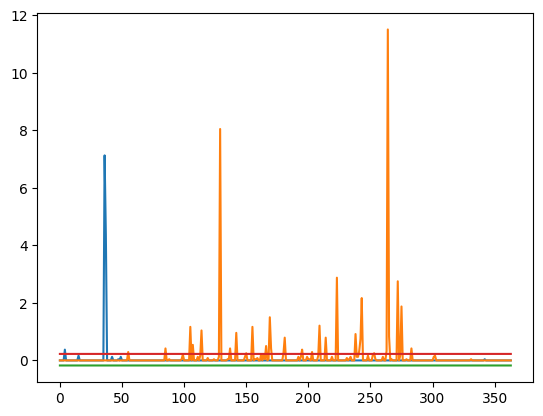

In [25]:
import matplotlib.pyplot as plt
plt.plot(y_test[:])
plt.plot(predictions[:])